In [9]:
import numpy as np
import csv
from os import listdir
from os.path import isfile, join
import natsort  
import glob

import matplotlib.pyplot as plt

In [42]:
path = "./raw/*/*/*"

def read_csv(path):
    out = []
    with open(path) as f:
        reader = csv.reader(f)
        for row in reader:
            row = [float(r.strip('][')) for r in row]
            out += [row]
    
    return out
        
def read_files(path):
    dirs = glob.glob(path)
    files = [f for f in dirs if '_1' in f]
    
    files = natsort.natsorted(files)
    data = [read_csv(f) for f in files]
    return [item for sublist in data for item in sublist]
    

data = read_files(path)

a = np.asarray(data[0::6])
b = np.asarray(data[1::6])
act = np.asarray(data[2::6])
gain = np.asarray(data[3::6])
seed = np.asarray(data[4::6])
timestamp = np.asarray(data[5::6])

In [38]:
# path = "./raw/*/*/*"

# def read_csv(path):
#     out = []
#     with open(path) as f:
#         reader = csv.reader(f)
#         for row in reader:
#             row = [float(r.strip('][')) for r in row]
#             out += [row]
    
#     return out
        
# def read_files(path):
#     dirs = glob.glob(path)
#     files = [f for f in dirs if '_1' not in f and '.csv' in f]
#     # files.sort(key=lambda f: int(filter(str.isdigit, f[12:22])))
#     files = natsort.natsorted(files)
#     data = [read_csv(f) for f in files]
#     return [item for sublist in data for item in sublist]
    

# data = read_files(path)

# a = np.asarray(data[0::6])
# b = np.asarray(data[1::6])
# act = np.asarray(data[2::6])
# gain = np.asarray(data[3::6])
# seed = np.asarray(data[4::6])
# timestamp = np.asarray(data[5::6])

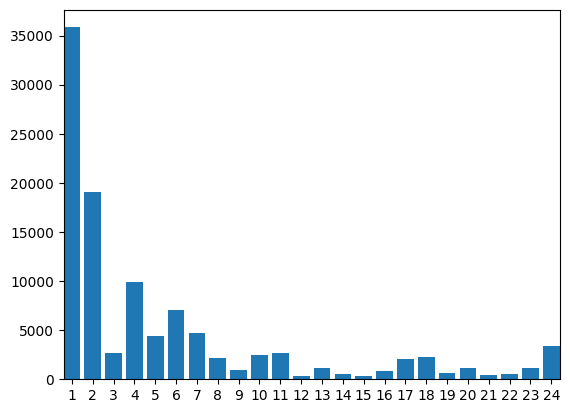

In [3]:
#LAYERS
uses = act.copy()
uses[uses>=0] = 0
uses += 1
uses = np.sum(uses, axis = 0)

fig, ax = plt.subplots()
layers = np.arange(1, 25)
plt.margins(x=0)

ax.bar(layers,uses)
plt.xticks(layers)
plt.show()

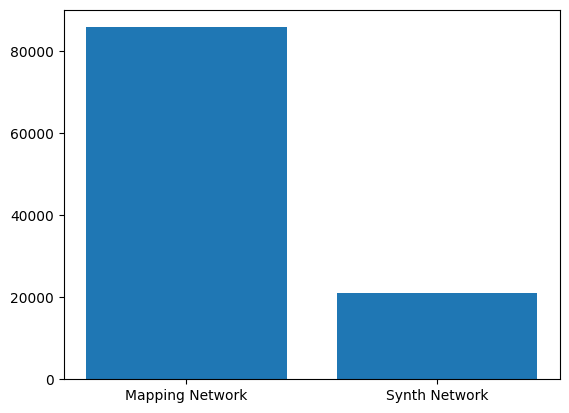

In [45]:
#Parts
uses = act.copy()
uses[uses>-1] = 1
uses[uses==-1] = 0
uses_map = np.sum(uses[:, :8])
uses_synth = np.sum(uses[:, 8:])
# uses = np.sum(uses, axis = 0)

fig, ax = plt.subplots()
layers = ['Mapping Network', 'Synth Network']

counts = [uses_map, uses_synth]
ax.bar(layers,counts)
plt.show()

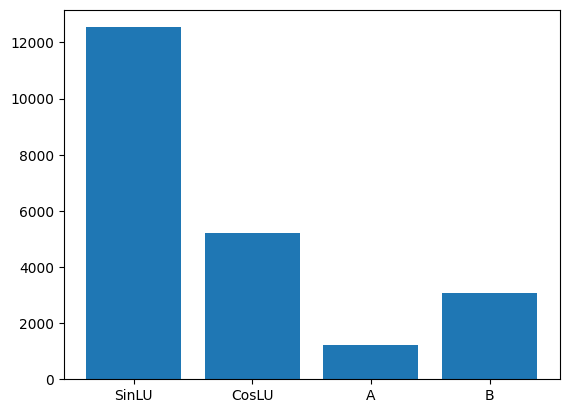

In [53]:
#Activations

act_rev = act.copy()
act_rev += 1
_, counts = np.unique(act_rev, return_counts=True)

fig, ax = plt.subplots()
names = ['SinLU', 'CosLU', 'A', 'B']
ax.bar(names,counts[1:])
plt.show()

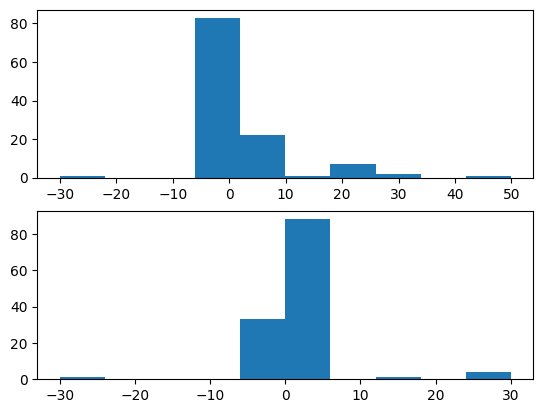

In [25]:
#Activations ab

a_rev = a.copy()
b_rev = b.copy()
act_rev = act.copy()
a_rev[act_rev == 2] = 0
a_rev[act_rev == 3] = 0
a_rev = a_rev[a_rev != 0]
b_rev = b_rev[b_rev != 0]
# a_rev[a_rev>30] = 40
# b_rev[b_rev>10] = 20


min_par_a = np.min(a_rev)
max_par_a = np.max(a_rev)
min_par_b = np.min(b_rev)
max_par_b = np.max(b_rev)

counts = np.unique(act_rev)

fig, ax = plt.subplots(2)
counts_a, bins_a = np.histogram(a_rev, density=False)
counts_b, bins_b = np.histogram(b_rev, density=False)

ax[0].hist(bins_a[:-1], bins=bins_a, weights=counts_a)
ax[1].hist(bins_b[:-1], bins=bins_b, weights=counts_b)
plt.show()

In [36]:
a2

array([[[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        ...,
        [3.  , 1.45, 0.  , ..., 0.  , 1.78, 0.  ],
        [3.  , 1.45, 0.  , ..., 0.  , 1.78, 0.  ],
        [3.  , 1.45, 0.  , ..., 0.  , 1.78, 0.  ]]])

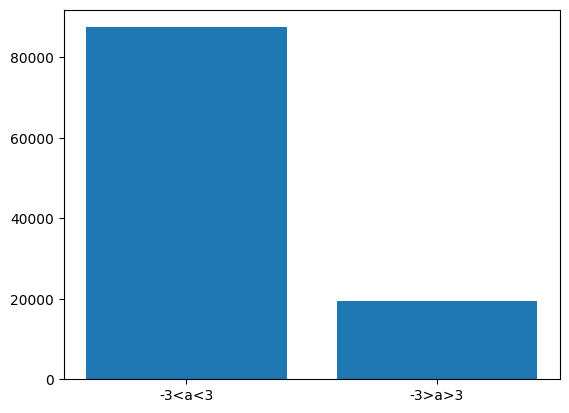

In [46]:
a_temp = a.copy()
act_rev = act.copy()
a_temp = a_temp[act != -1]
a1 = a_temp[a_temp<=3]
a1 = a1[a1>=-3]
a2 = list(a_temp[a_temp > 3])
a2 += list(a_temp[a_temp < -3])

fig, ax = plt.subplots()
layers = ['-3<a<3', '-3>a>3']

counts = [len(a1), len(a2)]
ax.bar(layers,counts)
plt.show()

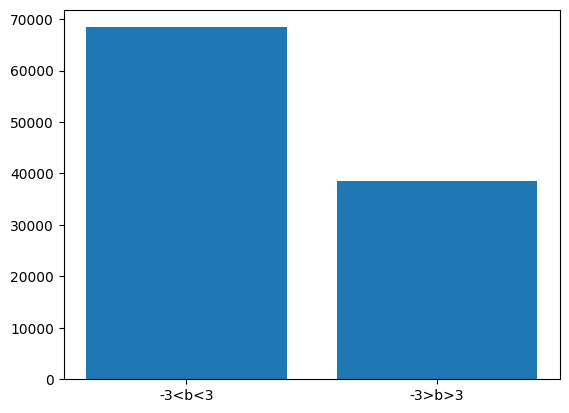

In [47]:
a_temp = b.copy()
act_rev = act.copy()
a_temp = a_temp[act != -1]
a1 = a_temp[a_temp<=3]
a1 = a1[a1>=-3]
a2 = list(a_temp[a_temp > 3])
a2 += list(a_temp[a_temp < -3])

fig, ax = plt.subplots()
layers = ['-3<b<3', '-3>b>3']

counts = [len(a1), len(a2)]
ax.bar(layers,counts)
plt.show()

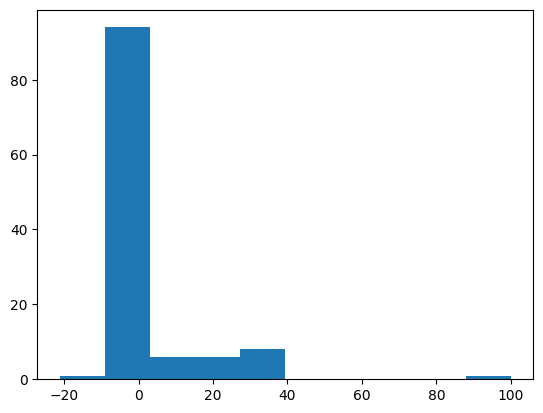

In [12]:
#Activations ab

a_rev = b.copy()
act_rev = act.copy()
a_rev[act_rev == 0] = 0
a_rev = a_rev[a_rev != 0]

min_par_a = np.min(a_rev)
max_par_a = np.max(a_rev)

counts = np.unique(act_rev)

fig, ax = plt.subplots()
counts_a, bins_a = np.histogram(a_rev, density=False)

ax.hist(bins_a[:-1], bins=bins_a, weights=counts_a)
plt.show()

In [30]:
timestamp_calc = np.asarray([timestamp[i+1]-timestamp[i] for i in range(0,len(timestamp)-1)])
timestamp_calc = timestamp_calc[timestamp_calc<500]
timestamp_calc

array([ 39.,  35., 130.,  70.,  68.,  98.,  67.,   3.,   4.,  23.,   5.,
        89., 311.,  12.,  41.,  53.,   6.,   5.,  57., 140.,  33.,   2.,
        23.,  11.,   6.,  17.,  49.,   2.,  22.,  25.,  11.,  23.,  87.,
        44.,  38.,  74.,   4.,   5.,  19.,  26.])